In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from  matplotlib.pyplot import subplot
%matplotlib inline
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error


In [221]:
#reading the file
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [200]:
#Lets take a glimpse of the dataset
# To check all are numerical fields
#Quaity is the dependent variable(discrete). All other fields are continuous.
#Data is free from missing values
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [201]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [202]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [203]:
#Checking null values in each column
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [204]:
#Checking length of dataset
print(df.shape)

(1599, 12)


In [205]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

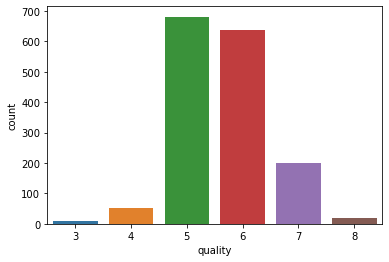

In [206]:
#DATA VISUALIZATION
sns.countplot(df['quality'])

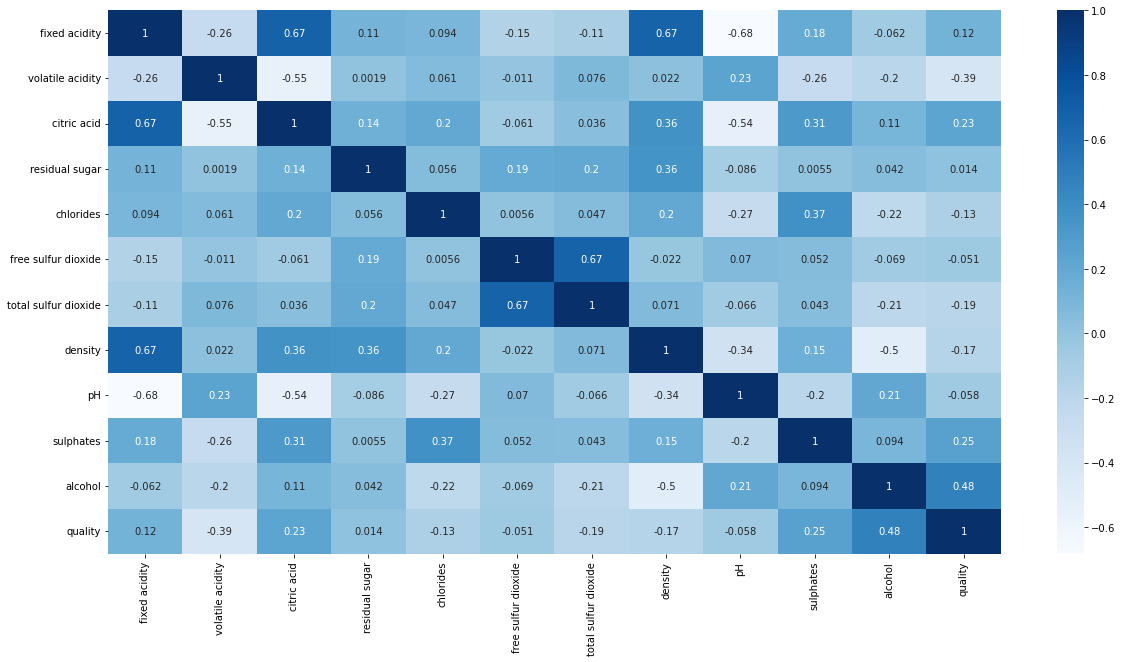

In [207]:
#Check the relationship between each variables
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,cmap='Blues')
plt.show()

graph for fixed acidity: total = 96


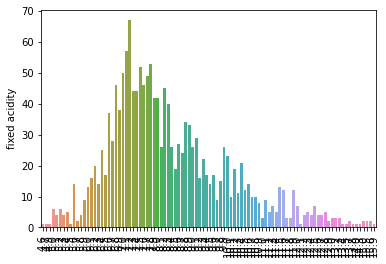

graph for volatile acidity: total = 143


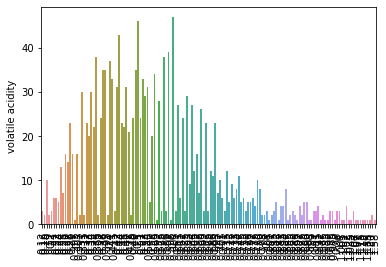

graph for citric acid: total = 80


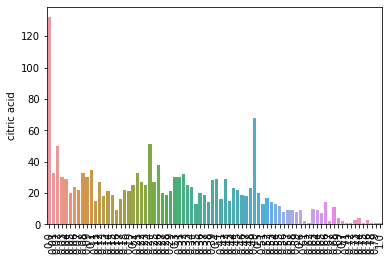

graph for residual sugar: total = 91


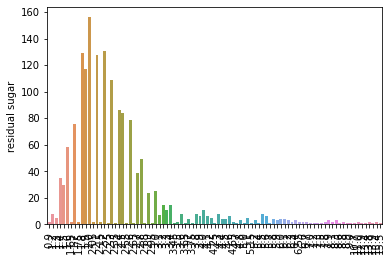

graph for chlorides: total = 153


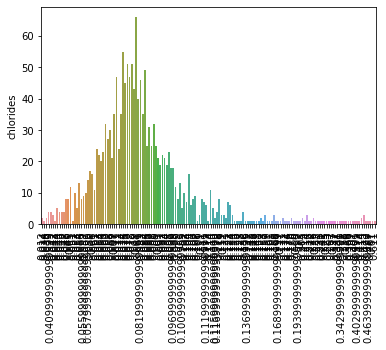

graph for free sulfur dioxide: total = 60


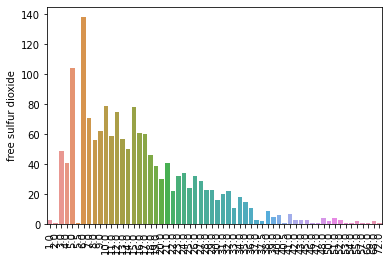

graph for total sulfur dioxide: total = 144


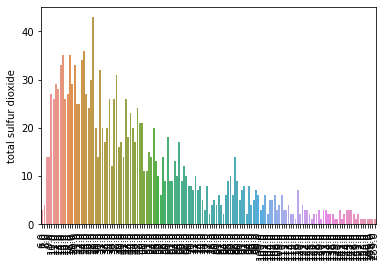

graph for density: total = 436


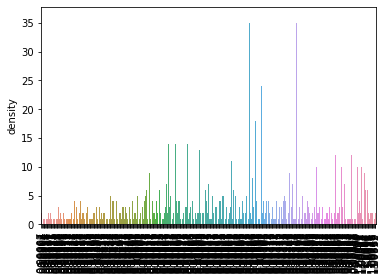

graph for pH: total = 89


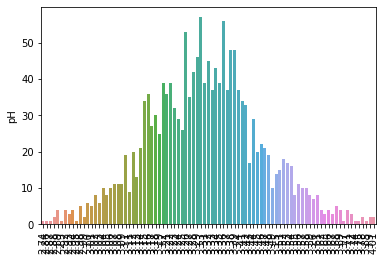

graph for sulphates: total = 96


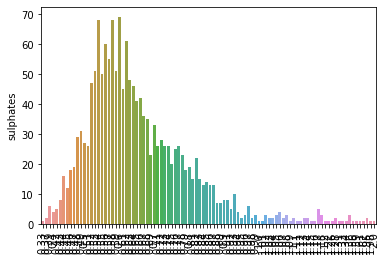

graph for alcohol: total = 65


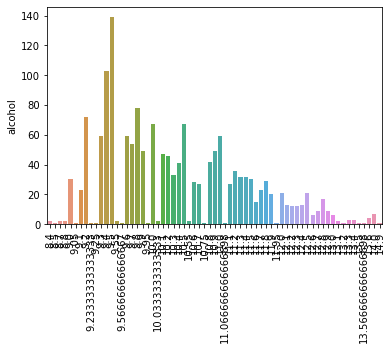

In [208]:
#looking into the categorical variables

df_cat=df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]

for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [209]:
#Target variable
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:ylabel='quality'>

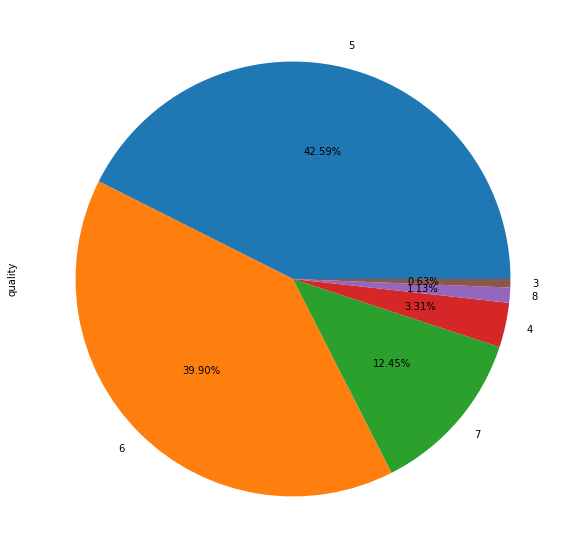

In [210]:
plt.figure(1, figsize=(10,10))
df['quality'].value_counts().plot.pie(autopct="%1.2f%%")

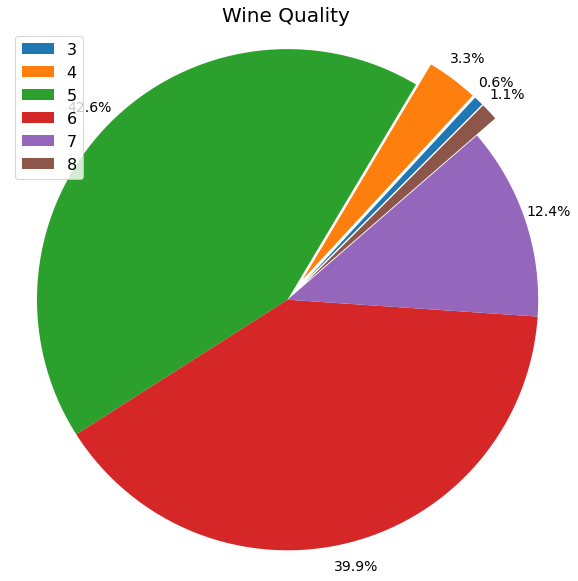

In [211]:
quality = df["quality"].value_counts().sort_index(ascending=True)
explode_list = [0.1, 0.1, 0, 0, 0, 0.1]
ax = quality.plot(kind='pie',
             figsize = (10,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             explode=explode_list,
             textprops={'fontsize': 14})
ax.patch.set_facecolor('white')
plt.title('Wine Quality', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=quality.index, loc="upper left", fontsize=16);

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


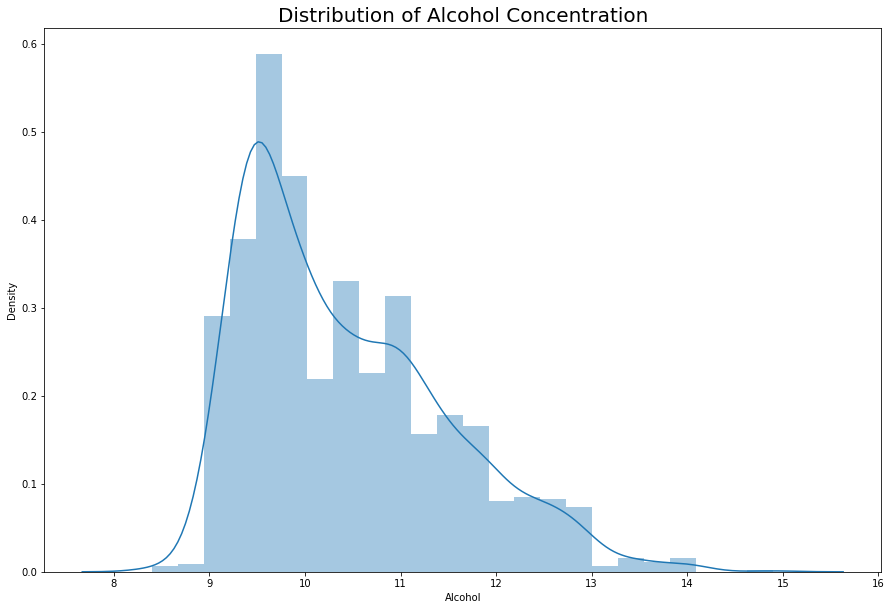

In [191]:
plt.figure(figsize=(15,10))
ax = sns.distplot(df['alcohol'])
ax.set_title('Distribution of Alcohol Concentration', size=20)
ax.set(ylabel='Density', xlabel='Alcohol');

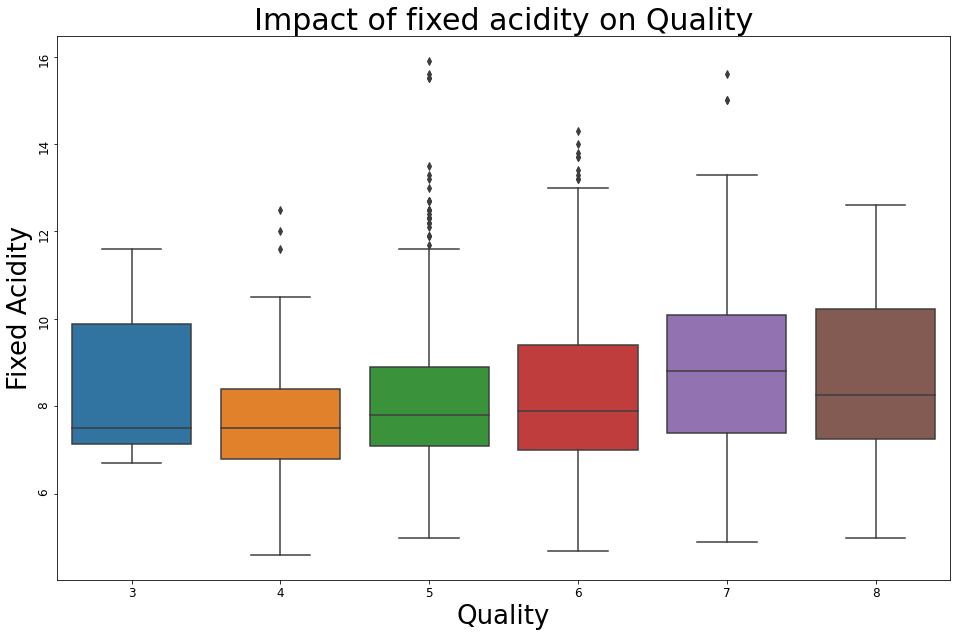

In [192]:
#DATA VISUALIZATION

plt.figure(figsize=(16,10))
sns.boxplot(y='fixed acidity',x='quality',data=df)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Impact of fixed acidity on Quality",fontsize=30)
plt.xlabel('Quality',fontsize=26)
plt.ylabel('Fixed Acidity',fontsize=26)
plt.show()

In [212]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [213]:
df['Good'] =df['quality'].apply(lambda x : 1 if(x>5) else 0)
df.drop(['quality'],inplace=True,axis=1)


In [214]:
#Lets see if we have a balanced distribution 
df['Good'].value_counts()

1    855
0    744
Name: Good, dtype: int64

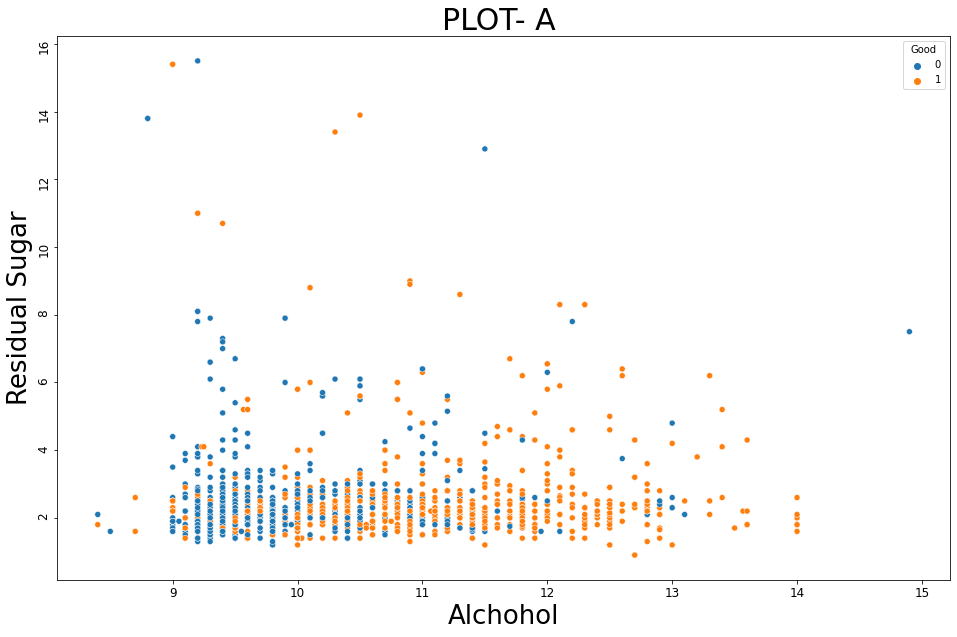

In [215]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='alcohol',y='residual sugar',data=df,hue='Good')
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("PLOT- A ",fontsize=30)
plt.xlabel('Alchohol',fontsize=26)
plt.ylabel('Residual Sugar',fontsize=26)
plt.show()

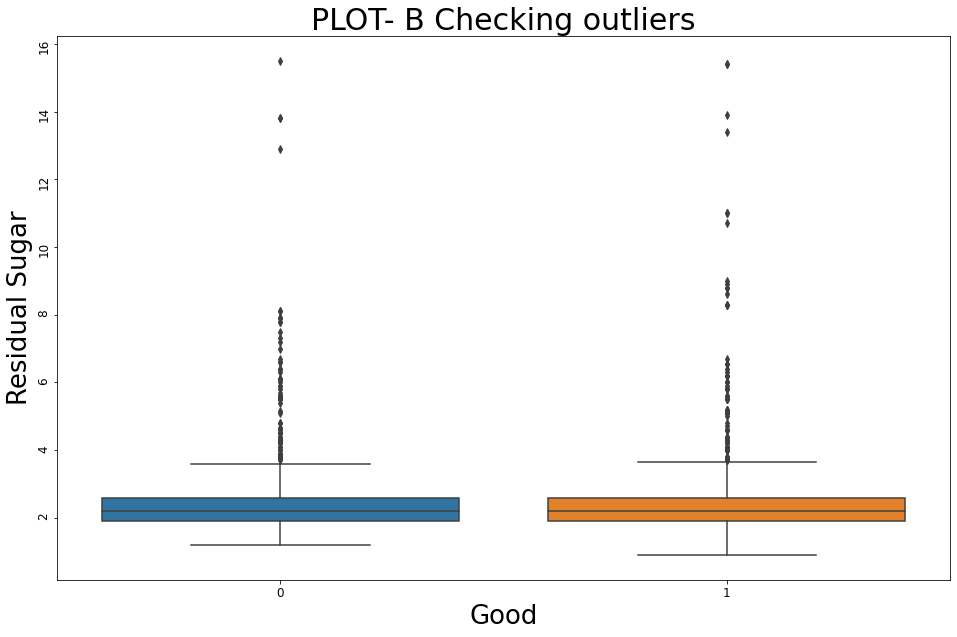

In [216]:
plt.figure(figsize=(16,10))
sns.boxplot(y='residual sugar',x='Good',data=df)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("PLOT- B Checking outliers",fontsize=30)
plt.xlabel('Good',fontsize=26)
plt.ylabel('Residual Sugar',fontsize=26)
plt.show()

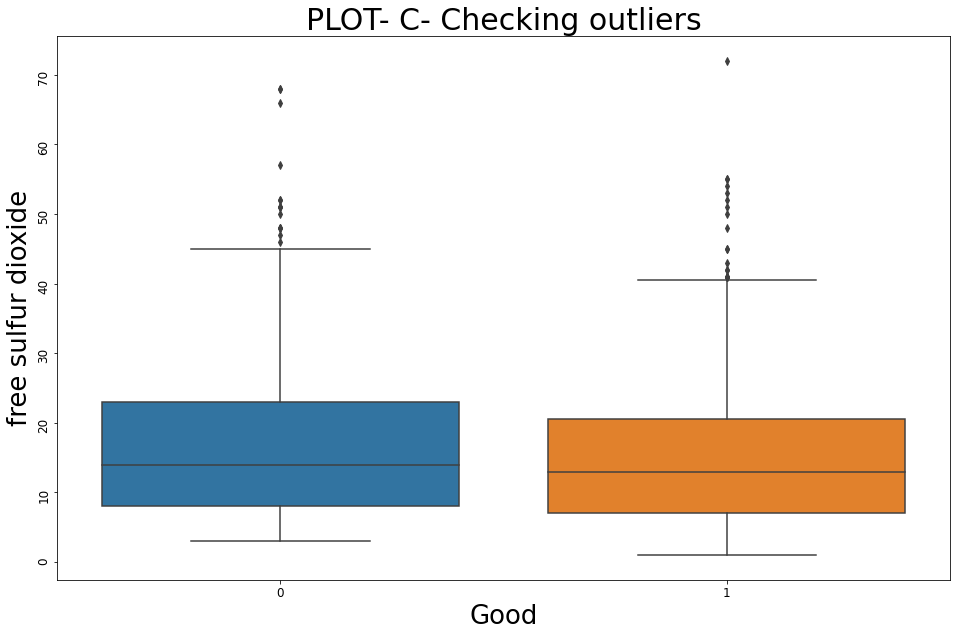

In [217]:
plt.figure(figsize=(16,10))
sns.boxplot(y='free sulfur dioxide',x='Good',data=df)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("PLOT- C- Checking outliers",fontsize=30)
plt.xlabel('Good',fontsize=26)
plt.ylabel('free sulfur dioxide',fontsize=26)
plt.show()

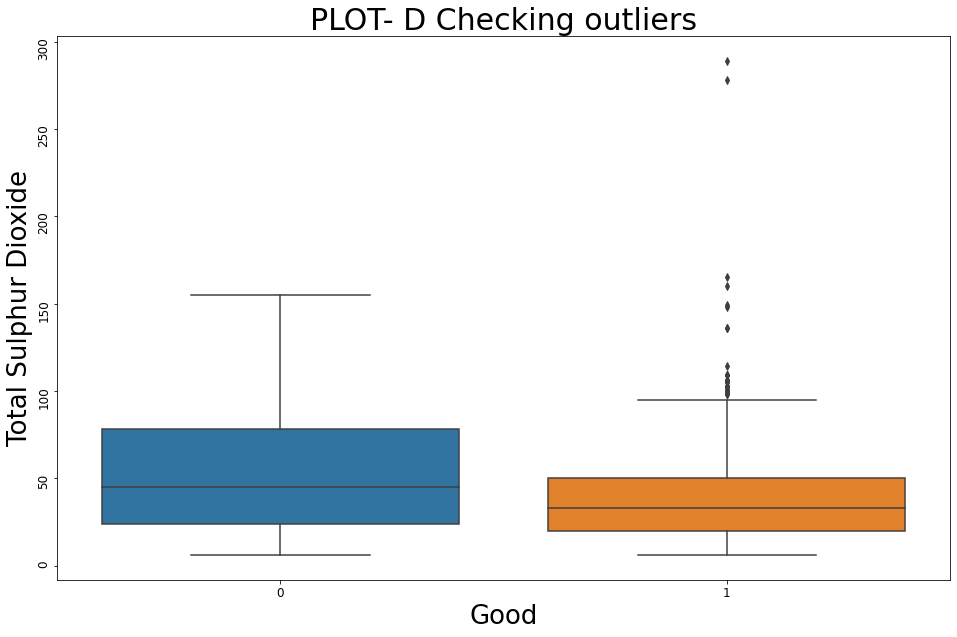

In [218]:
plt.figure(figsize=(16,10))
sns.boxplot(y='total sulfur dioxide',x='Good',data=df)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("PLOT- D Checking outliers",fontsize=30)
plt.xlabel('Good',fontsize=26)
plt.ylabel('Total Sulphur Dioxide',fontsize=26)
plt.show()

In [222]:
#PRE-PROCESSING OUR DATA
df['quality'].min()

3

In [223]:
df['quality'].max()


8

In [224]:
values = (2, 6, 9)
qual = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = values, labels = qual)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [225]:
#Now, we have 2 groups i.e. good quality and bad quality wine. This helps us with label encoding to classify data better.
df['quality'].value_counts()


bad     1382
good     217
Name: quality, dtype: int64

In [226]:
label_enc = LabelEncoder()
df['quality']=label_enc.fit_transform(df['quality'])


In [227]:
#SPLITTING TRAINING AND TESTING DATA
X = df.drop('quality',axis=1)
y = df['quality']


In [228]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [229]:
#Now, let us start by scaling the data and normalizing it to a particular range of values
std_scale = StandardScaler()
xtrain = std_scale.fit_transform(xtrain)
xtest = std_scale.fit_transform(xtest)


In [230]:
#CLASSIFICATION MODELS
#1. SVM (Support Vector Machine)
#2. Random Forest
#3.XGBoost CLASSIFIER


In [231]:
#1. SVM (SUPPORT VECTOR MACHINE)
model = svm.SVC()
model.fit(xtrain,ytrain)
y0_pred = model.predict(xtest)
print(accuracy_score(ytest,y0_pred))


0.875


In [232]:
#2. RANDOM FOREST
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
y1_pred = rf.predict(xtest)
print(accuracy_score(ytest,y1_pred))


0.8875


In [233]:
#3. XGBoost CLASSIFIER
xgb = XGBClassifier(max_depth=3,n_estimators=200,learning_rate=0.5)
xgb.fit(xtrain,ytrain)
y2_pred = xgb.predict(xtest)
print(accuracy_score(ytest,y2_pred))

0.903125


In [234]:
#CONFUSION MATRIX
print(confusion_matrix(ytest,y2_pred))


[[264   9]
 [ 22  25]]


In [235]:
#LOGISTIC REGRESSION
x=df.drop('quality', axis = 1)
y= df['quality']


In [236]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit_transform(x)

x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [237]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)


In [238]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression()
model = classifier_log.fit(xtrain,ytrain)

y_pred_log = classifier_log.predict(xtest)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_log, ytest)*100)


87.5


In [239]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

# doing pruning to avoid overfitting
classifier_tree=DecisionTreeClassifier(criterion ='gini', splitter = 'random',
                         max_leaf_nodes = 10, min_samples_leaf = 5, 
                         max_depth = 6)
model = classifier_tree.fit(xtrain, ytrain)

y_pred_tree = classifier_tree.predict(xtest)

print(accuracy_score(y_pred_tree, ytest)*100)


86.25


In [240]:
#CONCLUSION
print(classification_report(ytest,y2_pred))


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.74      0.53      0.62        47

    accuracy                           0.90       320
   macro avg       0.83      0.75      0.78       320
weighted avg       0.90      0.90      0.90       320

